In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

%matplotlib inline
sns.set_theme(style="darkgrid")

DIR_DATASET = r'/Users/dev-rocks/Documents/TCC - Data Science e Big Data/Projeto/datasets/'

In [3]:
colunas = ['id','descricaoTipo','anoDataset','statusExtracao',
           'tipoDocumento','tamanhoEmBytes','tema','tokens',
           'qtdTokens','semConteudo']

dfProposicoes = pd.read_csv(f'{DIR_DATASET}proposicoesUnificado.csv', sep=';', low_memory=False,usecols=colunas)


In [4]:
dfProposicoes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149175 entries, 0 to 149174
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              149175 non-null  int64 
 1   descricaoTipo   149175 non-null  object
 2   anoDataset      149175 non-null  int64 
 3   statusExtracao  149175 non-null  int64 
 4   tipoDocumento   149175 non-null  object
 5   tamanhoEmBytes  149175 non-null  int64 
 6   tema            53268 non-null   object
 7   tokens          147784 non-null  object
 8   semConteudo     149175 non-null  bool  
 9   qtdTokens       149175 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 10.4+ MB


,anoDataset,id
0,2018,20192
1,2019,42596
2,2020,40033
3,2021,46354


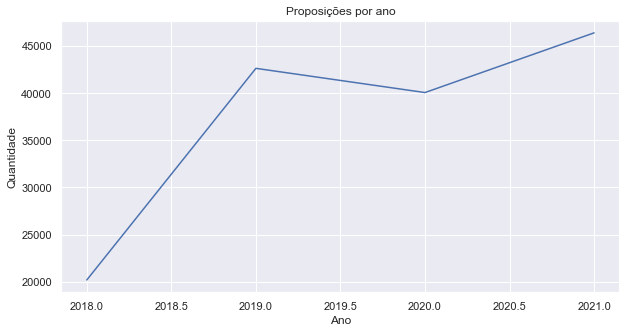

In [5]:
proposicoesPorAno = dfProposicoes.groupby(['anoDataset'], as_index=False)['id'].count()
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(x='anoDataset',y='id',data=proposicoesPorAno,markers=True, dashes=False)
ax.set_title('Proposições por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
ax.plot()

proposicoesPorAno

In [6]:
proposicoesPorAno = dfProposicoes.groupby(['tema','anoDataset'], as_index=False)['id'].count()
temasPorAno = proposicoesPorAno.pivot_table(index='tema',columns='anoDataset',values='id')
temasPorAno.loc[:,'Total'] = temasPorAno.sum(numeric_only=True, axis=1)
temasPorAno.sort_values(by='Total',ascending=False).head(10)


anoDataset,2018,2019,2020,2021,Total
tema,,,,,
Saúde,515.0,1299.0,3089.0,1730.0,6633.0
Direitos Humanos e Minorias,422.0,1252.0,1728.0,1791.0,5193.0
Administração Pública,400.0,1310.0,1987.0,1260.0,4957.0
Finanças Públicas e Orçamento,377.0,992.0,1712.0,1448.0,4529.0
Trabalho e Emprego,228.0,628.0,1331.0,832.0,3019.0
Educação,365.0,975.0,850.0,821.0,3011.0
Defesa e Segurança,174.0,647.0,771.0,618.0,2210.0
"Viação, Transporte e Mobilidade",252.0,793.0,542.0,514.0,2101.0
Direito Penal e Processual Penal,239.0,720.0,621.0,453.0,2033.0


,semConteudo,id
0,False,148186
1,True,989


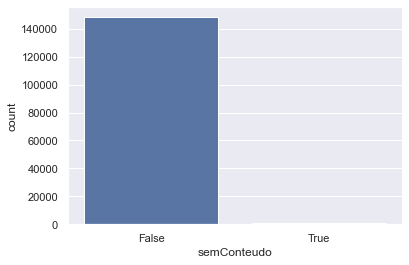

In [7]:
ax = sns.countplot( x="semConteudo", data=dfProposicoes,
            label="Total", color="b")

proposicoesPorConteudo = dfProposicoes.groupby(['semConteudo'], as_index=False)['id'].count()
proposicoesPorConteudo

In [8]:

dfProposicoesClassificadas = dfProposicoes.loc[dfProposicoes['tema'].isna()==False]
dfProposicoesClassificadas.info()
dfProposicoesClassificadas.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53268 entries, 0 to 149154
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              53268 non-null  int64 
 1   descricaoTipo   53268 non-null  object
 2   anoDataset      53268 non-null  int64 
 3   statusExtracao  53268 non-null  int64 
 4   tipoDocumento   53268 non-null  object
 5   tamanhoEmBytes  53268 non-null  int64 
 6   tema            53268 non-null  object
 7   tokens          53268 non-null  object
 8   semConteudo     53268 non-null  bool  
 9   qtdTokens       53268 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 4.1+ MB


,id,anoDataset,statusExtracao,tamanhoEmBytes,qtdTokens
count,5.326800e+04,53268.000000,53268.000000,5.326800e+04,53268.000000
mean,2.244052e+06,2019.821112,1.056976,2.078184e+05,200.689795
std,5.062797e+04,0.947793,0.467746,5.799588e+05,446.546067
min,3.088800e+05,2018.000000,1.000000,0.000000e+00,1.000000
25%,2.213243e+06,2019.000000,1.000000,1.084660e+05,16.000000
50%,2.251943e+06,2020.000000,1.000000,1.354940e+05,81.000000
75%,2.270702e+06,2021.000000,1.000000,1.920200e+05,268.000000
max,2.314680e+06,2021.000000,5.000000,5.182001e+07,22455.000000


In [9]:
dfProposicoesNaoClassificadas = dfProposicoes.loc[
    (dfProposicoes['tema'].isna()) & (dfProposicoes['tokens'].isna()==False)
]
dfProposicoesNaoClassificadas.info()
dfProposicoesNaoClassificadas.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94516 entries, 41 to 149174
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              94516 non-null  int64 
 1   descricaoTipo   94516 non-null  object
 2   anoDataset      94516 non-null  int64 
 3   statusExtracao  94516 non-null  int64 
 4   tipoDocumento   94516 non-null  object
 5   tamanhoEmBytes  94516 non-null  int64 
 6   tema            0 non-null      object
 7   tokens          94516 non-null  object
 8   semConteudo     94516 non-null  bool  
 9   qtdTokens       94516 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 7.3+ MB


,id,anoDataset,statusExtracao,tamanhoEmBytes,qtdTokens
count,9.451600e+04,94516.000000,94516.000000,9.451600e+04,94516.000000
mean,2.242591e+06,2019.720735,1.280122,1.117656e+06,466.080166
std,4.253425e+04,1.082747,1.011919,1.071824e+07,4524.750640
min,2.165076e+06,2018.000000,1.000000,0.000000e+00,1.000000
25%,2.205982e+06,2019.000000,1.000000,1.103180e+05,18.000000
50%,2.243836e+06,2020.000000,1.000000,1.478860e+05,95.000000
75%,2.281233e+06,2021.000000,1.000000,2.762530e+05,237.000000
max,2.316251e+06,2021.000000,5.000000,8.082264e+08,546910.000000


In [10]:
print(dfProposicoesClassificadas.groupby(['semConteudo'], as_index=False)['id'].count())


   semConteudo     id
0        False  53268


In [11]:
print(dfProposicoesNaoClassificadas.groupby(['semConteudo'], as_index=False)['id'].count())

   semConteudo     id
0        False  94516


In [49]:
stopwords = ['entra','vigor','vigorar','passa','congresso','nacional',
             'decreta','justificação', 'data','publicação','caput','artigo',
            'constituição','federal','parágrafo','sala','sessõe','trata','envio',
             'seguinte','redação','decreto','trata','regimento','ministro','caso',
             'senhor','modo','inciso','país','brasil','tais','vistas','anexo',
             'gabinete','nobres','pares','pare','único','http']

texto = ' '.join([tokens for tokens in dfProposicoesClassificadas['tokens'].astype(str)])
len(texto)

nuvemPalavras = WordCloud(stopwords=stopwords,background_color='white',width=1600,height=800).generate(texto)

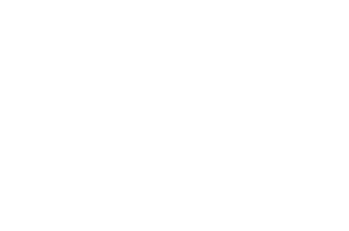

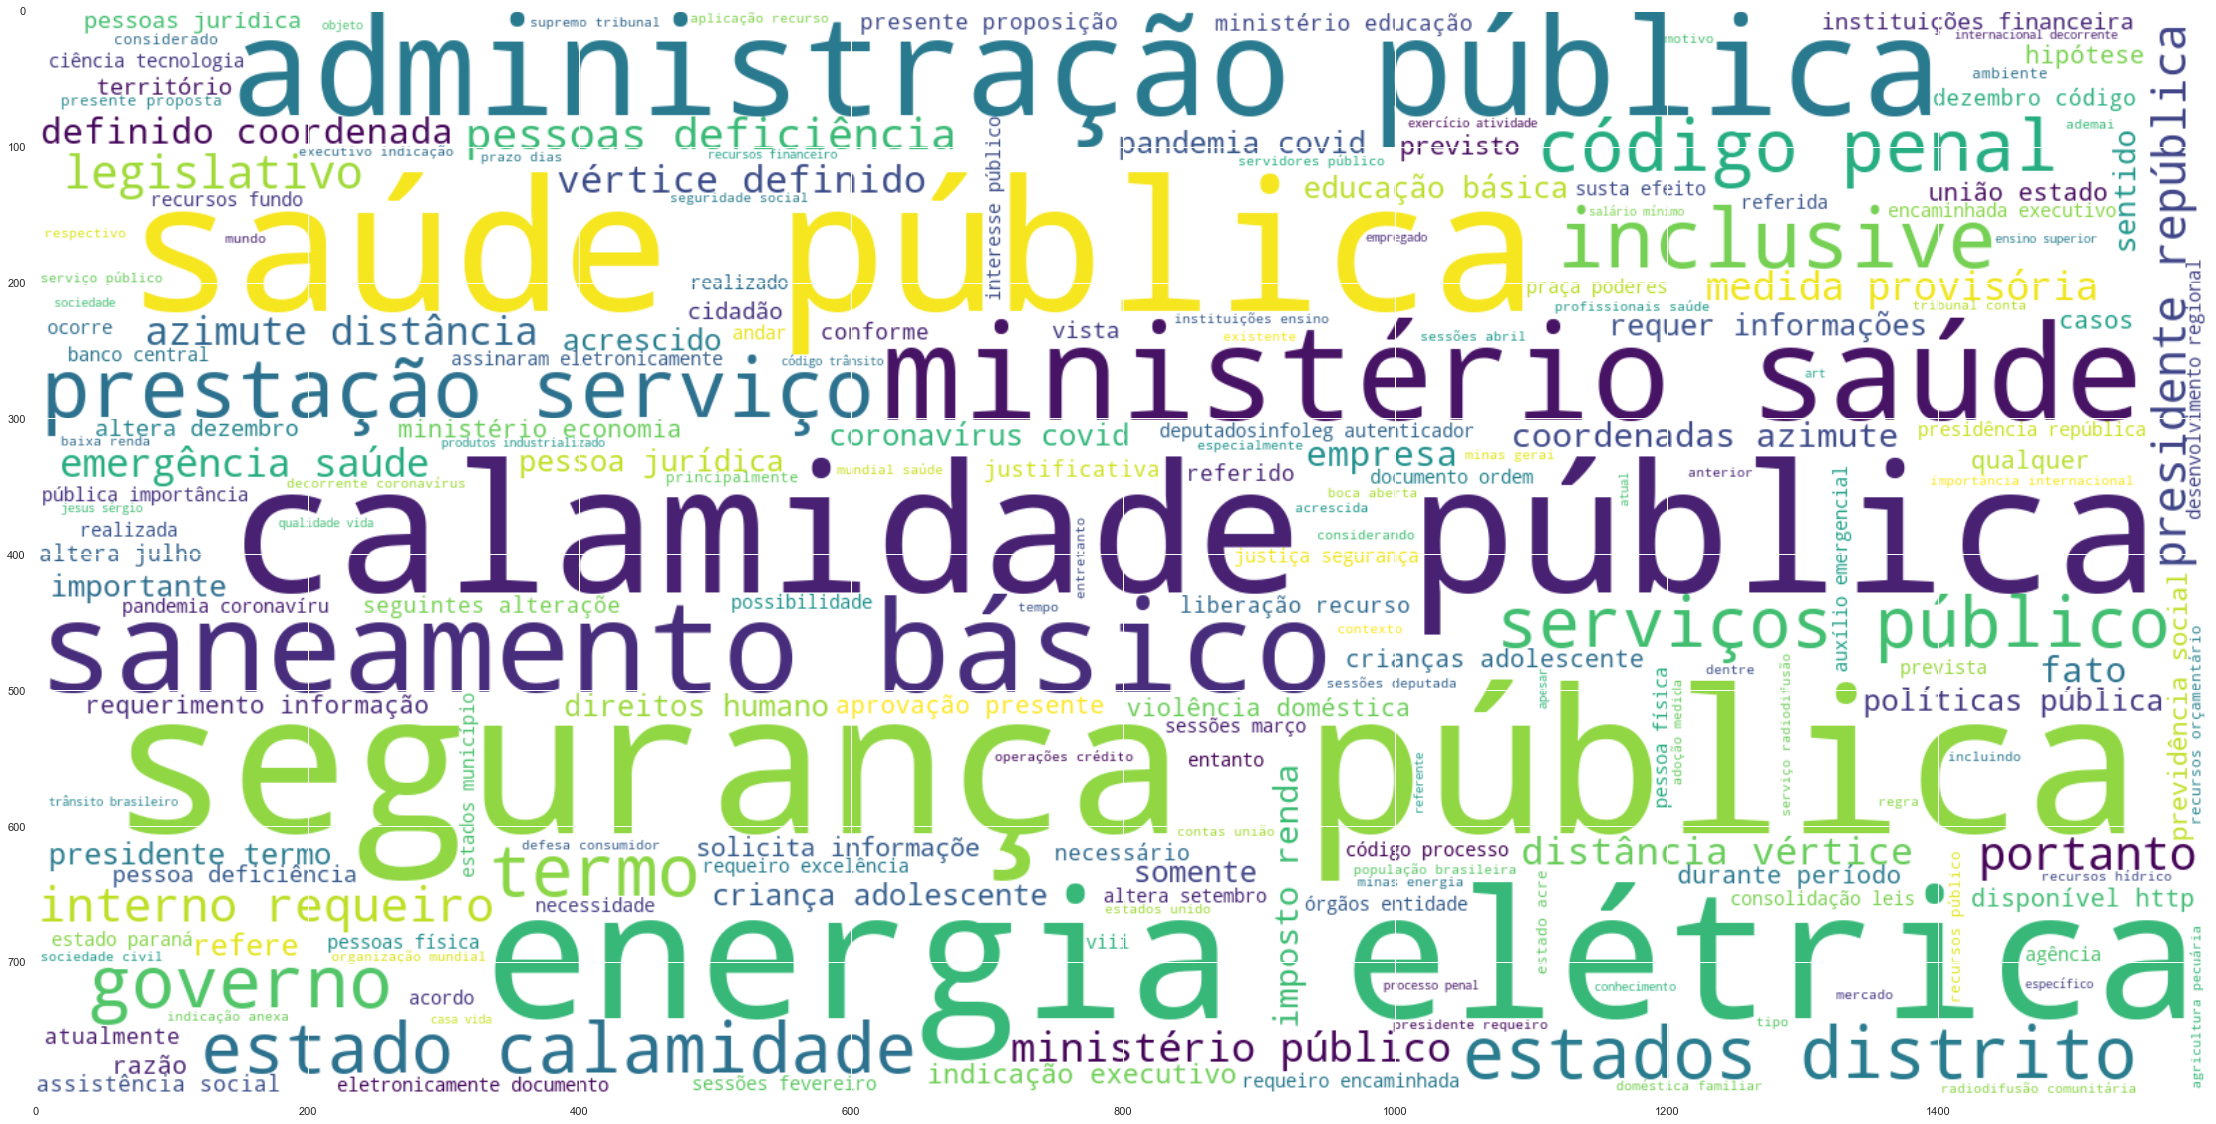

In [51]:
f, ax = plt.subplots(figsize=(18, 9))
plt.axis('off')
plt.imshow(nuvemPalavras,interpolation='bilinear')
plt.show()

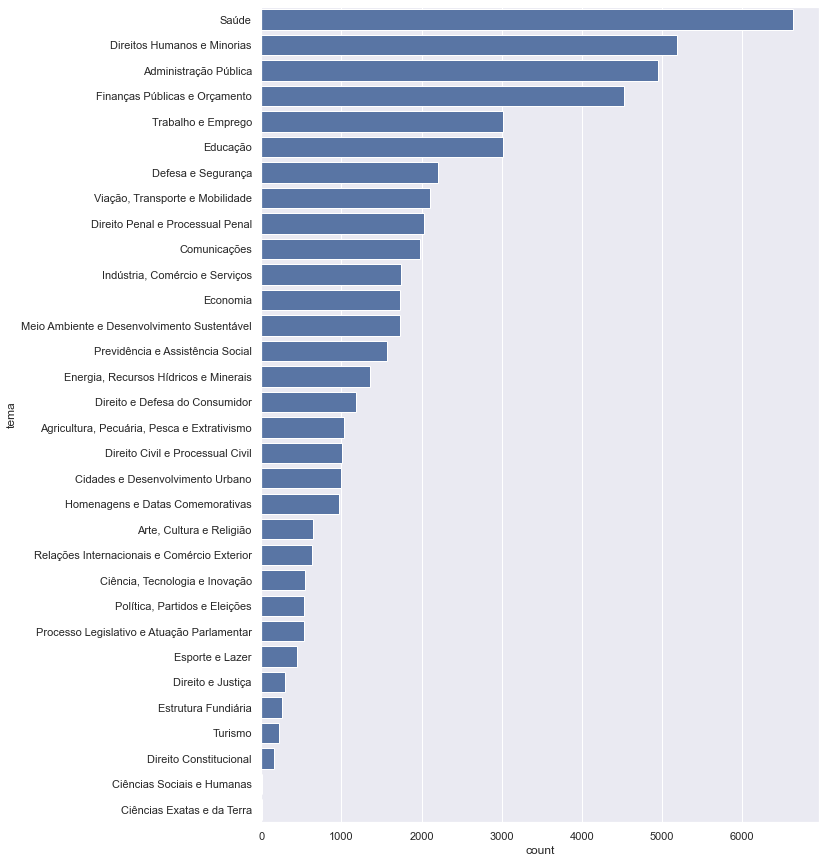

In [50]:
f, ax = plt.subplots(figsize=(10, 15))
ax = sns.countplot( y="tema", data=dfProposicoesClassificadas,
            label="Total", color="b", order=dfProposicoesClassificadas['tema'].value_counts().index)